In [42]:
from random import randrange, choice
from statistics import mean, stdev
from copy import deepcopy

In [43]:
class State:
    def __init__(self, no_of_queens, board_size, queen_pos=None):
        self.board_size = board_size
        if queen_pos is None:
            self.no_of_queens = no_of_queens
            self.queen_pos = frozenset(self.random_queen_position())
        else:
            self.queen_pos = frozenset(queen_pos)
            self.no_of_queens = len(self.queen_pos)

    # Place N queens at random position on the board
    def random_queen_position(self):
        open_columns = list(range(self.board_size))
        queen_pos = [(open_columns.pop(randrange(len(open_columns))), randrange(self.board_size)) for _ in
                           range(self.no_of_queens)]
        return queen_pos

    # Returns all the possible moves of the current state
    def successor_function(self):
        moves = []
        parent_queen_pos = list(self.queen_pos)
        for queen_index, queen in enumerate(parent_queen_pos):
            new_positions = [(queen[0], row) for row in range(self.board_size) if row != queen[1]]
            for new_position in new_positions:
                queen_pos = deepcopy(parent_queen_pos)
                queen_pos[queen_index] = new_position
                moves.append(State(self.no_of_queens, self.board_size, queen_pos))
        return moves

    # Checks if 2 queens are attacking each other or not
    def is_attacking(self, queens, a, b):
        if (a[0] == b[0]) or (a[1] == b[1]) or (abs(a[0] - b[0]) == abs(a[1] - b[1])):
            return True
        else:
            return False
            
    # Returns number of attacking pairs of queens
    def eval_function(self):
        attacking_pairs = []
        queen_pos = list(self.queen_pos)
        left_to_check = deepcopy(queen_pos)
        while left_to_check:
            a = left_to_check.pop()
            for b in left_to_check:
                if self.is_attacking(queen_pos, a, b):
                    attacking_pairs.append([a, b])
        return len(attacking_pairs)

In [44]:
class NQueenProblem:
    def __init__(self, N, start_state=None):
        if not start_state:
            start_state = State(no_of_queens=N, board_size=N)
        self.start_state = start_state

    def is_goal_state(self, state):
        return state.eval_function() == 0

    # Calculating heuristic value
    def heuristic(self, state):
        return state.eval_function()

In [45]:
def random_heuristic_move(current_state, problem):
    moves = current_state.successor_function()
    moves_heuristic = [problem.heuristic(move) for move in moves]
    current_heuristic = problem.heuristic(current_state)

    better_sol = []
    for index, move in enumerate(moves):
        if moves_heuristic[index] < current_heuristic:    #ignored worst states
            better_sol.append(move)
    if len(better_sol) != 0:
        return choice(better_sol)         #random choice
    else:
        return current_state
l=[]
def stochastic_hill_climb(problem):
    current_state = problem.start_state
    current_state_heuristic = problem.heuristic(current_state)
    path = []
    p=0
    while True and p<50 :
        path.append(current_state)
        random_move = random_heuristic_move(current_state, problem)
        random_move_heuristic = problem.heuristic(random_move)
        
        if random_move_heuristic >= current_state_heuristic:
            if(current_state_heuristic==0):
                print("global minima:", current_state_heuristic)
            else:
                print("local minima:", current_state_heuristic)
            l.append(current_state_heuristic)
            break
        else:
            current_state = random_move
            current_state_heuristic = random_move_heuristic
        p=p+1
    return {'result': 'success' if problem.is_goal_state(current_state) else 'failure',
            'solution': path,
            'problem': problem}

In [46]:
def print_result(problem_set, search_function):
    results = []
    answer=[]
   
    for problem in problem_set:
        
        result = search_function(problem)
        result['path_length'] = len(result['solution']) - 1
        results.append(result)
    results = [results,
               [result for result in results if result['result'] == 'success'],
               [result for result in results if result['result'] == 'failure']]

    num_iterations = len(results[0])
    successful_steps = []
    failure_steps = []
    
    for x in results[1]:
        successful_steps.append(x['path_length'])

    for x in results[2]:
        failure_steps.append(x['path_length'])
    
        
    print("Solved : ", len(results[1])*100/num_iterations, "%")
    print("No of steps in each successful run : ", successful_steps)
    print("Average no of steps when success : ", round(mean(successful_steps)), "\n")
    print("Stuck : ", len(results[2])*100/num_iterations, "%")
    print("No of steps in each failed run : ", failure_steps)
    print("Average no of steps when failed : ", round(mean(failure_steps)))

In [47]:
#n=int(input("Enter n:"))
queens_state = [NQueenProblem(16) for _ in range(20)]
print_result(queens_state, stochastic_hill_climb)

local minima: 2
local minima: 3
local minima: 3
local minima: 3
local minima: 2
local minima: 3
local minima: 2
local minima: 2
local minima: 2
local minima: 3
local minima: 2
local minima: 3
local minima: 3
global minima: 0
local minima: 3
local minima: 1
local minima: 3
local minima: 2
local minima: 2
local minima: 1
Solved :  5.0 %
No of steps in each successful run :  [14]
Average no of steps when success :  14 

Stuck :  95.0 %
No of steps in each failed run :  [10, 11, 6, 12, 13, 12, 9, 12, 10, 14, 8, 10, 10, 10, 11, 11, 9, 12, 15]
Average no of steps when failed :  11


In [48]:
frequency = {}
a=[]
for item in l:
    if item in frequency:
      
      frequency[item] += 1
    else:
     
      frequency[item] = 1

for i in frequency:
    a.append(frequency[i])

In [49]:
u = set(l) 
s = list(u)

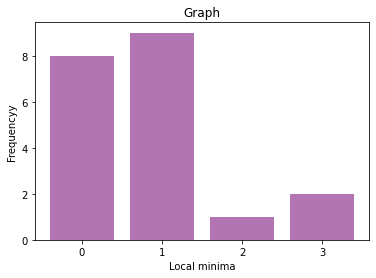

In [50]:
import matplotlib.pyplot as plt
import numpy as np
bars = s
x_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(x_pos, a, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('Graph')
plt.xlabel('Local minima')
plt.ylabel('Frequencyy')
 
# Create names on the x axis
plt.xticks(x_pos, bars)
 
# Show graph
plt.show()